In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Reading the dataset to the python environment 

In [2]:
df=pd.read_excel('iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pre-processing the data

## Filling the missing values

In [8]:
df.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

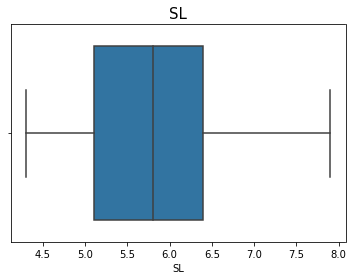

In [9]:
plt.figure()
sns.boxplot(x=df['SL'])
plt.title("SL", fontsize=15)
plt.show()

Since there are no outliers for SL so mean of the data will not be biased so filling the missing values using the mean

In [10]:
df['SL']=df['SL'].fillna(df['SL'].mean())


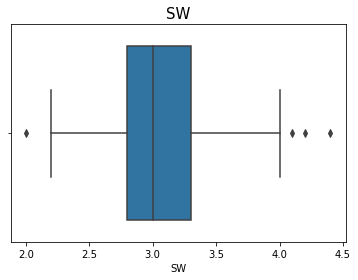

In [11]:
plt.figure()
sns.boxplot(x=df['SW'])
plt.title("SW", fontsize=15)
plt.show()

Here in case of SW there are outliers so filiing with median value

In [12]:
df['SW']=df['SW'].fillna(df['SW'].median())


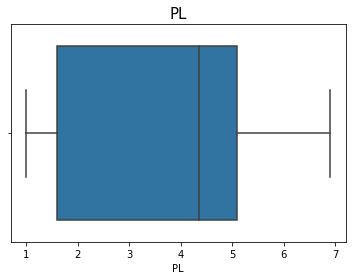

In [13]:
plt.figure()
sns.boxplot(x=df['PL'])
plt.title("PL", fontsize=15)
plt.show()

In [14]:
df['PL']=df['PL'].fillna(df['PL'].median())

Here also there are no outliers for PL so the  mean of the data will not be biased so filling the missing values using the mean

In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Label Encoding the classification Column

In [16]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [17]:
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [18]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [19]:
df.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.047333,3.780000,1.198667,1.000000
std,0.808480,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Find out which classification model gives the best result to predict iris species.


## Splitting the dataset

In [20]:
X=df.drop(['Classification'],axis=1)

In [21]:
y=df['Classification']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression


In [23]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train ,y_train)

C:\Users\anjue\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logit_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [26]:
print("Accuracy is:", accuracy_score(y_test,y_pred))


Accuracy is: 1.0


In [27]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Conclusion: 

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So logistic Regression is a good classification model that gives the best result to predict iris species.

## kNN model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [31]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

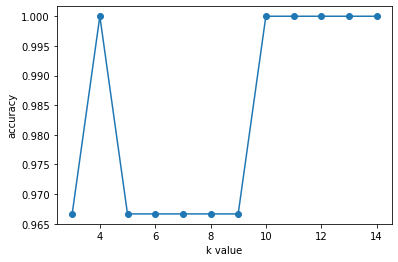

In [32]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

#Highest accuracy k is 4 After 10 the curve has a straight line trend which indicate that 10 is a satuartion point so we take k=4

In [33]:
classifier= KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred1=classifier.predict(X_test)

In [34]:
print("Accuracy is:",accuracy_score(y_test,y_pred1))


Accuracy is: 1.0


In [35]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred1))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
classification_report(y_test, y_pred1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Conclusion: 

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So kNN model is a good classification model that gives the best result to predict iris species.

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred2 =dt_model.predict(X_test)

In [39]:
print("Accuracy is:",accuracy_score(y_test,y_pred2))

Accuracy is: 1.0


In [40]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred2))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Conclusion: 

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So Decision Tree is a good classification model that gives the best result to predict iris species.

## SVM model

### Linear SVM

In [42]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')

In [43]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [44]:
y_pred3=svm_linear.predict(X_test)

In [45]:
print("Accuracy is:",accuracy_score(y_test,y_pred3))

Accuracy is: 1.0


In [46]:
classification_report(y_test, y_pred3)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [47]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred3))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Conclusion: 

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So Linear SVM is a good classification model that gives the best result to predict iris species.

### Polynomial SVM

In [48]:
svm_poly = SVC(kernel='poly',degree=2)
svm_poly.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [49]:
y_pred4=svm_poly.predict(X_test)


In [50]:
print("Accuracy is:",accuracy_score(y_test,y_pred4))

Accuracy is: 1.0


In [51]:
classification_report(y_test, y_pred4)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [52]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred4))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Conclusion:

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So Polynomial SVM is a good classification model that gives the best result to predict iris species.


### Radial SVM

In [53]:
svm_radial= SVC(kernel='rbf')

In [54]:
svm_radial.fit(X_train,y_train)

SVC()

In [55]:
y_pred5=svm_radial.predict(X_test)

In [56]:
print("Accuracy is:",accuracy_score(y_test,y_pred5))

Accuracy is: 1.0


In [57]:
classification_report(y_test, y_pred5)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [58]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred5))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Conclusion:

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So Radial SVM is a good classification model that gives the best result to predict iris species.


# Random Forest model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred6=rf.predict(X_test)

In [62]:
print("Accuracy is:",accuracy_score(y_test,y_pred6))

Accuracy is: 1.0


In [63]:
print("confusion_matrix is:",confusion_matrix(y_test,y_pred6))

confusion_matrix is: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [64]:
classification_report(y_test, y_pred6)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Conclusion:

Since the accuracy,precision, recall and f1 score are 1 the model is good fit for the data but there may be a chances of overfitting.

Also confusion matrix shows that there are no misclassificaton So Random Forest model is a good classification model that gives the best result to predict iris species.


# Conclusion:
             

### SInce all the models give high accuracy and precision values and there are no misclassifications in all  the above models any of the classification models (Logistic Regression, Decision Tree, SVM, kNN model or Random Forest model)can be used to fit the data and to get the best result to predict iris species